In [1]:
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from pandas import read_csv
from keras.models import Sequential
from keras import metrics
from keras import regularizers
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, LSTM, GRU
from sklearn.metrics import confusion_matrix
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.multioutput import MultiOutputRegressor
from warnings import filterwarnings
filterwarnings('ignore')

C:\Users\stefa\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv("dengue_features_train.csv", index_col=[0])
    
# add labels to dataframe
labels = pd.read_csv("dengue_labels_train.csv", index_col=[0])
df['total_cases'] = labels['total_cases']

# separate san juan and iquitos
sj = df.loc['sj']
iq = df.loc['iq']


df = pd.read_csv("dengue_features_train.csv")
    
# add labels to dataframe
labels = pd.read_csv("dengue_labels_train.csv")

df["total_cases"] = labels.total_cases


scorer = make_scorer(mean_absolute_error, False)

In [3]:
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [4]:
#There are null values in the dataset
df.describe

<bound method NDFrame.describe of      city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0      sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1      sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2      sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3      sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4      sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   
5      sj  1990          23      1990-06-04       NaN  0.174850  0.254314   
6      sj  1990          24      1990-06-11  0.112900  0.092800  0.205071   
7      sj  1990          25      1990-06-18  0.072500  0.072500  0.151471   
8      sj  1990          26      1990-06-25  0.102450  0.146175  0.125571   
9      sj  1990          27      1990-07-02       NaN  0.121550  0.160683   
10     sj  1990          28      1990-07-09  0.192875  0.082350  0.191943   
11     sj  1990          29      1990-07-1

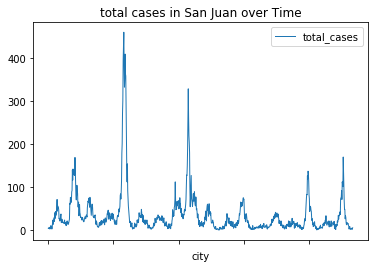

In [5]:
#check if total_cases got a correlation to time -> there is none
(sj
 .total_cases
 .plot
 .line(lw = 1),)
plt.title("total cases in San Juan over Time")    
plt.legend()
plt.show()

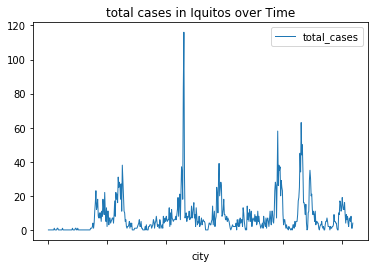

In [6]:
#check if total_cases got a correlation to time -> there is none

(iq
 .total_cases
 .plot
 .line(lw = 1),
     )
plt.legend()
plt.title("total cases in Iquitos over Time")
plt.show()

In [7]:
sj_corr = sj.corr()

# plot the heatmap
#sns.heatmap(corr, 
#        xticklabels=corr.columns,
#        yticklabels=corr.columns)



cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

sj_corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Correlation of Features in San Juan")\
    .set_precision(2)\
    .set_table_styles(magnify())



,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
year,1,-0.073,-0.39,-0.5,-0.015,-0.078,0.032,0.19,0.19,0.015,0.18,0.11,-0.13,-0.29,0.032,0.018,0.33,-0.097,-0.28,-0.17,-0.0021,0.083,-0.21
weekofyear,-0.073,1,-0.02,-0.024,-0.0094,-0.076,0.23,0.58,0.56,0.58,0.52,0.57,0.25,0.31,0.23,0.59,-0.099,0.49,-0.14,0.33,0.52,0.21,0.29
ndvi_ne,-0.39,-0.02,1,0.67,0.23,0.18,-0.049,-0.073,-0.071,-0.04,-0.045,-0.096,0.0044,0.039,-0.049,-0.035,-0.0092,0.064,0.14,0.092,0.019,-0.086,0.038
ndvi_nw,-0.5,-0.024,0.67,1,0.2,0.21,-0.032,-0.077,-0.076,-0.026,-0.046,-0.075,0.0094,0.077,-0.032,-0.021,-0.051,0.087,0.18,0.14,0.016,-0.076,0.075
ndvi_se,-0.015,-0.0094,0.23,0.2,1,0.82,-0.12,-0.015,-0.012,-0.063,-0.0074,-0.046,-0.13,-0.11,-0.12,-0.058,0.029,-0.057,0.018,-0.064,-0.069,-0.14,0.0011
ndvi_sw,-0.078,-0.076,0.18,0.21,0.82,1,-0.12,-0.043,-0.036,-0.088,-0.015,-0.072,-0.13,-0.12,-0.12,-0.081,0.052,-0.041,0.07,-0.018,-0.074,-0.18,-0.00033
precipitation_amt_mm,0.032,0.23,-0.049,-0.032,-0.12,-0.12,1,0.23,0.22,0.4,0.26,0.25,0.51,0.5,1,0.41,-0.094,0.2,-0.16,0.19,0.22,0.57,0.06
reanalysis_air_temp_k,0.19,0.58,-0.073,-0.077,-0.015,-0.043,0.23,1,1,0.9,0.94,0.94,0.08,0.3,0.23,0.9,0.18,0.88,0.039,0.7,0.83,0.11,0.18
reanalysis_avg_temp_k,0.19,0.56,-0.071,-0.076,-0.012,-0.036,0.22,1,1,0.9,0.94,0.94,0.062,0.29,0.22,0.9,0.2,0.88,0.054,0.7,0.83,0.098,0.18
reanalysis_dew_point_temp_k,0.015,0.58,-0.04,-0.026,-0.063,-0.088,0.4,0.9,0.9,1,0.85,0.9,0.33,0.68,0.4,1,-0.036,0.87,-0.057,0.69,0.85,0.29,0.2


In [8]:
#plt = sns.heatmap(sj_corr, 
   #     xticklabels=sj_corr.columns,
    #    yticklabels=sj_corr.columns)



In [9]:
iq_corr = iq.corr()

# plot the heatmap
#sns.heatmap(corr, 
#        xticklabels=corr.columns,
#        yticklabels=corr.columns)



cmap = sns.diverging_palette(5, 250, as_cmap=True)


iq_corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Correlation of Features in Iquitos")\
    .set_precision(2)\
    .set_table_styles(magnify())


,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
year,1,-0.14,-0.064,0.031,-0.072,-0.017,0.085,0.023,0.0061,0.32,-0.16,0.22,0.16,0.26,0.085,0.32,-0.24,0.082,-0.1,0.041,0.13,-0.027,0.18
weekofyear,-0.14,1,0.25,0.22,0.32,0.26,-0.12,0.29,0.31,-0.1,0.41,-0.03,-0.15,-0.29,-0.12,-0.09,0.35,0.081,0.24,0.21,-0.11,-0.041,-0.012
ndvi_ne,-0.064,0.25,1,0.76,0.77,0.84,-0.012,0.15,0.17,-0.032,0.21,-0.00049,-0.084,-0.13,-0.012,-0.031,0.16,0.11,0.15,0.14,-0.016,0.0087,0.02
ndvi_nw,0.031,0.22,0.76,1,0.64,0.76,-0.06,0.15,0.17,-0.035,0.2,0.0054,-0.077,-0.13,-0.06,-0.031,0.16,0.12,0.2,0.16,-0.098,-0.013,-0.0096
ndvi_se,-0.072,0.32,0.77,0.64,1,0.71,-0.044,0.2,0.21,-0.064,0.26,-0.023,-0.12,-0.19,-0.044,-0.062,0.22,0.11,0.19,0.17,-0.062,0.012,-0.041
ndvi_sw,-0.017,0.26,0.84,0.76,0.71,1,-0.02,0.16,0.18,-0.031,0.23,0.0032,-0.064,-0.14,-0.02,-0.027,0.17,0.11,0.18,0.18,-0.063,-0.0054,0.033
precipitation_amt_mm,0.085,-0.12,-0.012,-0.06,-0.044,-0.02,1,-0.049,-0.054,0.47,-0.23,0.32,0.34,0.43,1,0.47,-0.38,0.11,-0.18,-0.012,0.31,0.38,0.09
reanalysis_air_temp_k,0.023,0.29,0.15,0.15,0.2,0.16,-0.049,1,0.97,0.15,0.75,0.41,-0.085,-0.55,-0.049,0.18,0.55,0.6,0.51,0.64,0.24,-0.13,0.097
reanalysis_avg_temp_k,0.0061,0.31,0.17,0.17,0.21,0.18,-0.054,0.97,1,0.14,0.78,0.4,-0.11,-0.54,-0.054,0.17,0.6,0.57,0.51,0.62,0.21,-0.13,0.08
reanalysis_dew_point_temp_k,0.32,-0.1,-0.032,-0.035,-0.064,-0.031,0.47,0.15,0.14,1,-0.25,0.75,0.57,0.74,0.47,1,-0.61,0.33,-0.26,0.08,0.62,0.18,0.23


In [10]:
#reanalysis_avg_temp_k and reanalysis_air_temp_k are correlating
#reanalysis_sat_precip_amt_mm and precipitation_amt_mm are correlating
#reanalysis_specific_humidity_g_per_kg and reanalysis_dew_point_temp_k are correlating
#one features from each pair can be dropped


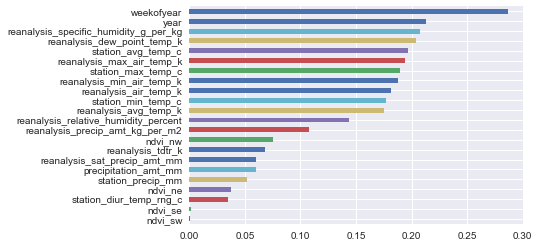

In [11]:
sns.set(font_scale = 1)
(abs(sj_corr)
 .total_cases
 .drop('total_cases')
 .sort_values()
 .plot
 .barh())

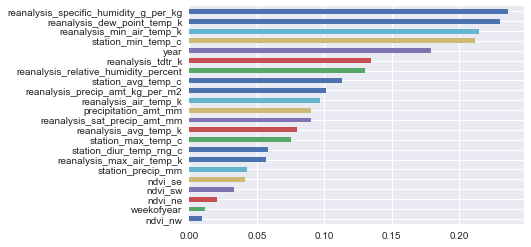

In [12]:
sns.set(font_scale = 1)
(abs(iq_corr)
 .total_cases
 .drop('total_cases')
 .sort_values()
 .plot
 .barh())

In [13]:
#after understanding the dataset now move on to the data mining

def get_data(data_path, labels_path):
    df = pd.read_csv(data_path, index_col=[0])
   
    df = df.drop(columns=['week_start_date'])
    # fill missing values
    df.fillna(method='ffill', inplace=True)

    # add labels to dataframe
    if labels_path:
        labels = pd.read_csv(labels_path, index_col=[0])
        df['total_cases'] = labels['total_cases']
        
    return df

def prepare_data(data_path, labels_path):
    # load data and set index to city, year, weekofyear
    df = get_data(data_path, labels_path)
    
    # separate san juan and iquitos
    sj = df.loc['sj']
    iq = df.loc['iq']

    return sj, iq

def preprocess_and_prepare_data(data_path, labels_path):
    #get df
    df = get_data(data_path, labels_path)
    
    #change the unit of all temperatures to Celcius
    
    df['reanalysis_min_air_temp_c'] = df['reanalysis_min_air_temp_k'] - 273.15
    df = df.drop(columns=['reanalysis_min_air_temp_k'])
    
    df['reanalysis_max_air_temp_c'] = df['reanalysis_max_air_temp_k'] - 273.15
    df = df.drop(columns=['reanalysis_max_air_temp_k'])
    
    df['reanalysis_dew_point_temp_c'] = df['reanalysis_dew_point_temp_k'] - 273.15
    df = df.drop(columns=['reanalysis_dew_point_temp_k'])
    
    df['reanalysis_air_temp_c'] = df['reanalysis_air_temp_k'] - 273.15
    df = df.drop(columns=['reanalysis_air_temp_k'])
    
    #only the sj dataset benefits from the changes so the iq is saved before the feature extraction
    iq = df.loc['iq']
    
    
    #drop all features wich are correlating with another
    df = df.drop(columns=['reanalysis_avg_temp_k'])
    df = df.drop(columns=['reanalysis_sat_precip_amt_mm'])
    df = df.drop(columns=['reanalysis_specific_humidity_g_per_kg'])
    
  

    #normalize data
    #df_norm = (df - df.mean()) / (df.max() - df.min())

    
    sj = df.loc['sj']
    


    return sj, iq

In [14]:
sj_train, iq_train = preprocess_and_prepare_data('dengue_features_train.csv',
                                    labels_path="dengue_labels_train.csv")#

def rescale_data_for_regressions(X):
    scaler = MinMaxScaler(feature_range=(0, 1))
    #TODO # scale all together
    scaler = scaler.fit(X)
    X = scaler.transform(X)
    return X

#defining and preparing data for cross validations for both cities
X_sj = sj_train.drop(columns=["total_cases"])
y_sj = sj_train["total_cases"]
X_sj = rescale_data_for_regressions(X_sj)

X_iq = iq_train.drop(columns=["total_cases"])
y_iq = iq_train["total_cases"]
X_iq = rescale_data_for_regressions(X_iq)

def rescale_data_for_neural_networks(X):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    #TODO # scale all together
    scaler = scaler.fit(X)
    X = scaler.transform(X)
    return X

#defining and preparing data for neural networks for both cities

X_train_sj, X_test_sj, y_train_sj, y_test_sj = train_test_split(rescale_data_for_neural_networks(X_sj)
                                                                , y_sj, random_state = 5)
X_train_iq, X_test_iq, y_train_iq, y_test_iq = train_test_split(rescale_data_for_neural_networks(X_iq)
                                                                , y_iq, random_state = 5)

In [58]:

def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step

        
def regressions(X, y):   
    #Regressionen
    hyper = frange(0.1, 3.0, 0.1)
    #Ridge Regression
    best_hyper_ridge = 0
    best_score_ridge = 0

    #train model
    for i in hyper:
        ridge = Ridge(alpha=i, solver="cholesky", random_state=1)
        cv_score_ridge  = np.sqrt(-cross_val_score(estimator=ridge, X = X, y= y, cv=10, scoring = scorer))
        if temp > cv_score_ridge.mean:
            best_hyper_ridge = i
            best_score_ridge = cv_score_ridge.mean
    print("Best ridge alpha: {:.2f}".format(best_hyper_ridge))   
    print("Best ridge set score: {:.2f}".format(best_score_ridge))

    #Lasso Regression

    best_hyper_lasso = 0
    best_score_lasso = 0

    #train model
    for i in hyper:
        lasso = Lasso(alpha=i)
        cv_score_lasso  = np.sqrt(-cross_val_score(estimator=lasso, X = X, y= y, cv=10, scoring = scorer))
        if temp > cv_score_lasso.mean():
            best_hyper_lasso = i
            best_score_lasso = cv_score_lasso.mean()
    print("Best lasso alpha: {:.2f}".format(best_hyper_lasso))
    print("Best lasso set score: {:.2f}".format(best_score_lasso))

In [16]:
def best_forest(X_train , y_train, X_test, y_test):
    #testing best number of trees
    training_accuracy = []
    test_accuracy = []
    # try number of trees from 1 to 35
    tree_range = range(1, 35)
    best_number = 0
    best_score = 0
    #train model for range of trees to get data for graph
    for trees in tree_range:
        forest = RandomForestRegressor(n_estimators= trees, random_state=1)
        forest.fit(X_train, y_train)
        # record training set accuracy
        training_accuracy.append(forest.score(X_train, y_train))
        # record generalization accuracy
        temp = forest.score(X_test, y_test)
        if temp > best_score:
            best_number = trees
            best_score = temp 
        test_accuracy.append(temp)

    #plot graph
    plt.plot(tree_range, training_accuracy, label="training accuracy")
    plt.plot(tree_range, test_accuracy, label="test accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("trees")
    plt.legend()
    print(str(best_number) +" " + str (best_score))


In [17]:
def forest(X,y):
    forest = RandomForestRegressor(n_estimators= 27, random_state=1)

    cv_score_forest  = np.sqrt(-cross_val_score(estimator=forest, X = X, y= y, cv=10, scoring = scorer))
    print("forest score {.2f}".format(cv_score_forest.mean()))
    

In [18]:
def best_knr(X_train, y_train, X_test, y_test):
    #testing best number of neigbours
    training_accuracy = []
    test_accuracy = []
    # try n_neighbours from 1 to 80
    neighbors_settings = range(1, 80)
    best_number = 0
    best_score = 0

    #train model for all range of neigbors to get data for graph
    for n_neighbors in neighbors_settings:
        knr = KNeighborsRegressor(n_neighbors = n_neighbors)
        knr.fit(X_train, y_train)
        # record training set accuracy
        training_accuracy.append(knr.score(X_train, y_train))
        # record generalization accuracy
        temp= knr.score(X_test, y_test)
        if temp > best_score:
            best_number = n_neighbors
            best_score = temp 
        test_accuracy.append(temp)

    #plot graph
    plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
    plt.plot(neighbors_settings, test_accuracy, label="test accuracy")

    plt.ylabel("Accuracy")
    plt.xlabel("n_neighbors")
    plt.legend()
    print(str(best_number) +" " + str (best_score))


In [19]:
def K_nearest_neighbours(X,y):
    knr = KNeighborsRegressor(n_neighbors = 32)
    cv_score_knr  = np.sqrt(-cross_val_score(estimator=knr, X = X, y=y, cv=10, scoring = scorer))
    print("knr score {.2f}".format(cv_score_knr.mean()))

In [59]:

# create model
def build_model(x_size, y_size):
    model = Sequential()
    model.add(Dense(20, input_dim=x_size, kernel_initializer='normal', activation='tanh'))
    model.add(Dense(10,  kernel_initializer='normal', activation='relu'))
    model.add(Dense(5,  kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal' ))
    # Compile model
    model.compile(loss='mae', optimizer='nadam')
    return model

def build_model_2(x_size, y_size):
    model = Sequential()
    model.add(Dense(100, activation="tanh", input_shape=(x_size,)))
    model.add(Dropout(0.1))
    model.add(Dense(50, activation="relu"))
    model.add(Dense(20, activation="relu"))
    model.add(Dense(y_size))
    model.compile(loss='mae',
    optimizer='nadam',
    metrics=[metrics.mae])
    return(model)

def build_model_3(x_size, y_size):
    model = Sequential()
    model.add(Dense(x_size, activation="tanh", kernel_initializer='normal', input_shape=(x_size,)))
    model.add(Dropout(0.2))
    model.add(Dense(int(x_size*2), activation="relu", kernel_initializer='normal',
    kernel_regularizer=regularizers.l1(1e-5), bias_regularizer=regularizers.l1(1e-5)))
    model.add(Dropout(0.3))
    model.add(Dense(int(x_size*.75), activation="relu", kernel_initializer='normal',
    kernel_regularizer=regularizers.l1_l2(1e-3), bias_regularizer=regularizers.l1_l2(1e-3)))
    model.add(Dropout(0.2))
    model.add(Dense(int(y_size*7), activation="relu", kernel_initializer='normal'))
    model.add(Dense(y_size))
    model.add(Dropout(0.0))
    model.compile(
    loss='mae',
    optimizer='nadam',
    metrics=[metrics.mae])
    return model

def change_data_for_lstm(X_train, X_test):
    # Prepare X_values for lstm
    timesteps = 1

    X_train = X_train.reshape(X_train.shape[0], timesteps, int(X_train.shape[1]/timesteps))
    X_test = X_test.reshape(X_test.shape[0], timesteps, int(X_test.shape[1]/timesteps))
    
    return X_train, X_test


def build_ltsm_net(X_train_np, X_test_np):
    model = Sequential()
    model.add(LSTM((X_train_np.shape[1]*X_train_np.shape[2])*2, return_sequences=True,
                   input_shape=(X_train_np.shape[1], X_train_np.shape[2])))
    model.add(LSTM(X_train_np.shape[1]*X_train_np.shape[2], return_sequences=True))
    model.add(LSTM(X_train_np.shape[1], return_sequences=False))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mae', optimizer='nadam')  
    return model

seed = 7
np.random.seed(seed)

def train_ltsm_net_iq():
    #reshape the df. Change Type to numpy array to achieve this
    X_train_np, X_test_np = change_data_for_lstm(X_train_iq, X_test_iq)
    model = build_ltsm_net(X_train_np, X_test_np)
     # fit the model
    history = model.fit(X_train_np, y_train_iq, epochs=125, batch_size=4, 
                        validation_data=(X_test_np, y_test_iq), verbose=0, shuffle=False)
    print(history)
    #print result for each epoch
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    
    plt.legend()
    plt.show()
    return model


def predict_total_cases_model(X_train, y_train, X_test, y_test , mod):
    
    
    if mod == 1 :
        model = build_model(X_train.shape[1], 1)
        history = model.fit(X_train, y_train, epochs=100, batch_size=75, 
                        validation_data=(X_test, y_test), verbose=0, shuffle=False)
        print(history)
        #print result for each epoch
        plt.plot(history.history['loss'], label='train')
        plt.plot(history.history['val_loss'], label='test')
        pred = model.predict(X_test)
        return pred
    elif mod == 2:
        model = build_model_2(X_train.shape[1], 1)
        history = model.fit(X_train, y_train, epochs=100, batch_size=75, 
                        validation_data=(X_test, y_test), verbose=0, shuffle=False)
        print(history)
        #print result for each epoch
        plt.plot(history.history['loss'], label='train')
        plt.plot(history.history['val_loss'], label='test')
        pred = model.predict(X_test)
        return pred
    elif mod == 3:
        model = build_model_3(X_train.shape[1], 1)
        history = model.fit(X_train, y_train, epochs=150, batch_size=75, 
                        validation_data=(X_test, y_test), verbose=0, shuffle=False)
        print(history)
        #print result for each epoch
        plt.plot(history.history['loss'], label='train')
        plt.plot(history.history['val_loss'], label='test')
        pred = model.predict(X_test)
        return pred  
    else:
        print("Model with number {:.2f} does not Exist".format(num))
        
def predict_total_cases_lstm(X_train, y_train, X_test, y_test):
    
    model = train_ltsm_net_iq()
    X_train_np, X_test_np = change_data_for_lstm(X_train, X_test)
    pred = model.predict(X_test_np)
    return pred
    #estimator = KerasRegressor(build_fn=basic_model_3, epochs=350, batch_size=75, verbose=0)
#kfold = KFold(n_splits=10, random_state=seed)
#results = cross_val_score(estimator, X_train_iq, y_train_iq, cv=kfold)



In [33]:
#Evalutating all models

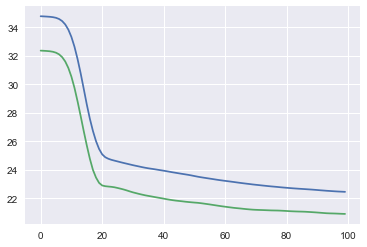

In [36]:
pred_model_1_sj =  predict_total_cases_model(X_train_sj, y_train_sj, X_test_sj, y_test_sj, 1)

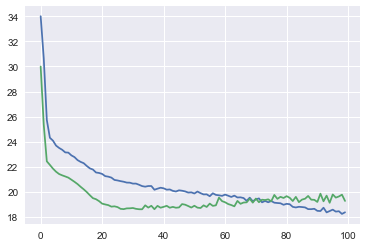

In [43]:
pred_model_2_sj =  predict_total_cases_model(X_train_sj, y_train_sj, X_test_sj, y_test_sj, 2)

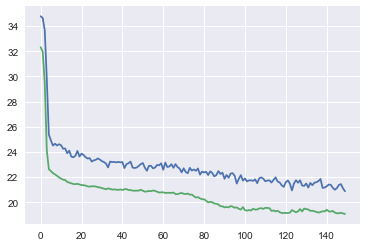

In [46]:
pred_model_3_sj =  predict_total_cases_model(X_train_sj, y_train_sj, X_test_sj, y_test_sj, 3)

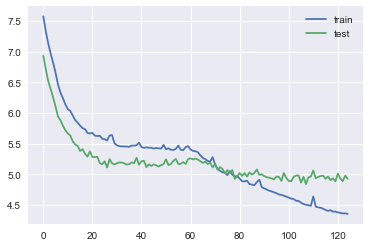

ValueError: Error when checking : expected lstm_1_input to have shape (1, 22) but got array with shape (1, 19)

In [52]:
pred_model_lstm_sj = predict_total_cases_lstm(X_train_sj, y_train_sj, X_test_sj, y_test_sj)

4 0.5521159116517825


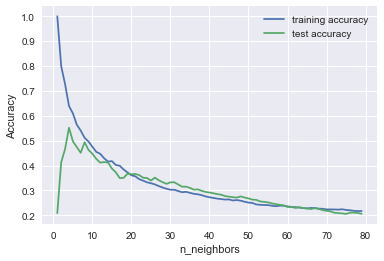

In [53]:
best_knr(X_train_sj, y_train_sj, X_test_sj, y_test_sj)

In [56]:
knr

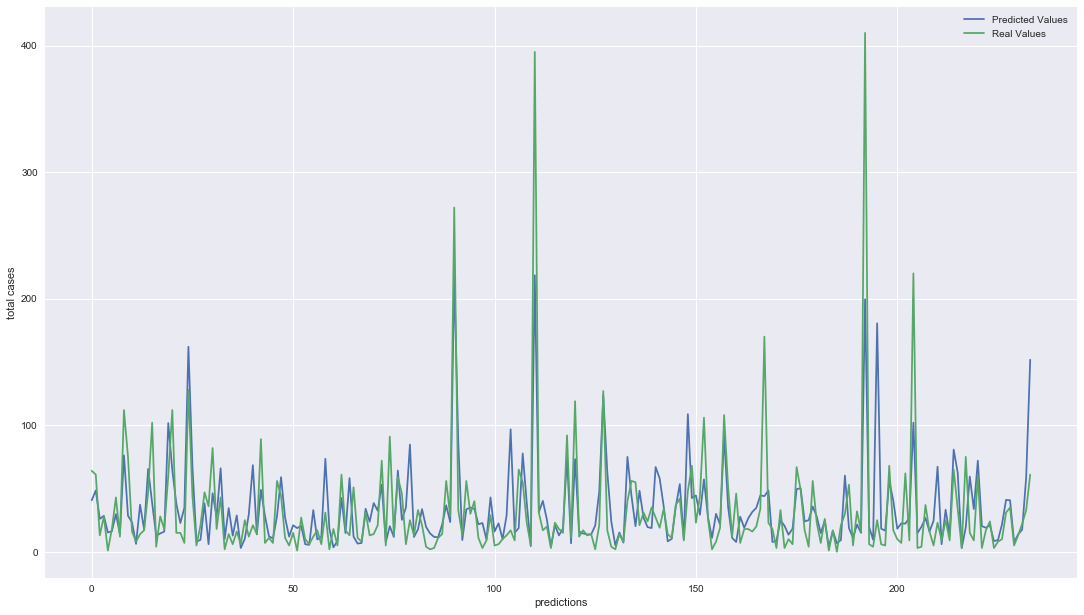

In [57]:
r = range (0 , len(pred))

plt.plot(r, pred, label="Predicted Values")
plt.plot(r, y_test_sj, label="Real Values")
plt.ylabel("total cases")
plt.xlabel("predictions")
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)


In [ ]:
len(pred)